> This script is TEMPORTAL. Holds steps 0.40 to 0.83 <br>
> Sources:
  
> Input file `data-regrouped-cpc-divisions-into-3-categories.xlsx` containing:
>  * Sheet1: Extended data with chosen LCIA methods, important metadata and PubChem properties
>  * METADATA: list of relevant metadata used in Sheet1.
>  * METHODS: list of LCIA methods used in Sheet1.

Note:
> `data-regrouped-cpc-divisions-into-3-categories.xlsx` file was generated in `0.31-vt-regroup-cpc-divisions-into-3-categories.ipynb`

# PENDING TO EDIT

In [1]:
# %env
# %who_ls
# %who
# %who int
# %pinfo <var name>

# Imports

In [1]:
%config IPCompleter.use_jedi = False # disable jedi autocompleter (https://stackoverflow.com/a/65734178/14485040)

import project_path  # makes possible the access to `src` directory using relative path
from src.data import (
    
    filter_dataframe,
    internal_funcs,
    outlier_detectors,
)
from src.utils import explore_dir, make_readme_info
from src.utils import read_excel_to_pandas as r_excel
from src.utils import set_outputs_dir
from src.utils import write_pandas_to_excel as w_excel

%run init_nb.ipynb

# INPUTS: Identify file(s) and read data to df

In [2]:
# Explore the directory to find the file(s)
inputs_dir, files_list = explore_dir(
    path_to_dir=r"..\data\interim", file_extension="xlsx", print_files_list=True
)

['CPC33to36_other_chemicals.xlsx',
 'data-filtered-cpc-33to36-divisions.xlsx',
 'data-regrouped-cpc-divisions-into-3-categories.xlsx',
 'df_chemproperties.xlsx',
 'extended-data-chosen-methods-metadata-pubchem-properties.xlsx',
 'lcia-results-from-sp910-combined.xlsx',
 'list-chemicals-not-shown-on-fig-prices-vs-impacts.xlsx',
 'list-chemicals-not-shown-on-fig3.xlsx',
 'list-outliers.xlsx',
 'mapped-lcia-results.xlsx',
 'pubchem-properties.xlsx',
 'raw-data-chosen-lcia-methods-and-metadata.xlsx',
 'temp-df_base_full_wCAS.xlsx',
 'temp-df_base_full_wCAS_woOutliersRMDk9a5.xlsx',
 'temp-dict_fullMethods.xlsx',
 'to-check-regrouped-data-other-chemicals-category.xlsx']


In [6]:
# Read data
df_cpc33to36 = r_excel(
    inputs_dir, "data-regrouped-cpc-divisions-into-3-categories.xlsx"
)
print(
    "df_cpc33to36".ljust(40, "."),
    f"{df_cpc33to36.shape}\n".rjust(13, "."),
)

# Get list of LCIA methods and list of metadata
METHODS = r_excel(
    inputs_dir,
    "data-regrouped-cpc-divisions-into-3-categories.xlsx",
    sheets="METHODS",
    show_readme=False, 
)["METHODS"].values.tolist()

METADATA = r_excel(
    inputs_dir,
    "data-regrouped-cpc-divisions-into-3-categories.xlsx",
    sheets="METADATA",
    show_readme=False, 
)["METADATA"].values.tolist()


===> Trying to load 'readme' data... ===
File: data-regrouped-cpc-divisions-into-3-categories.xlsx from
C:\Users\ViteksPC\Documents\00-ETH_projects\17-AESA_ecoinvent_chemicals\notebooks\0.31-vt-regroup-cpc-divisions-into-3-categories.ipynb
Generated on 2021-07-30 (Friday), 18:09:25 by Tulus, V.
Includes:
<<<
Sheet1: Dataframe with chemicals from divisions 33-36 is regrouped into 3 categoreis: 'organic', 'inorganic' or 'other'.[New column 'category_regrouped' is added]
METADATA: list of relevant metadata used in Sheet1.
METHODS: list of LCIA methods used in Sheet1.
[METHODS + METADATA have to be the only column labels in Sheet1]
>>>

df_cpc33to36............................ ...(892, 39)



In [5]:
pd.options.display.max_columns = None

# Operations

### TO DELETE

## Filtering outliers
<div class="alert alert-block alert-info">
use previously created:  <br>
    <strong>df_base_full</strong> - only GLO, kg markets from CPC 33-36  <br>
    <strong>ddf_base_full_wCAS</strong> - only GLO, kg markets from CPC 33-36 with identified chemical properties (could be refined!)
</div>

### apply Mahalanobis Distance method to detect outliers

In [35]:
# df_to_detect_MDm = df_base_full
df_to_detect_MDm = df_base_full_wCAS

(
    df_clean_metNtlNpr_MDm,
    df_outliers_metNtlNpr_MDm,
    more_metNtlNpr_MDm,
) = outlier_detectors.mahalanobis_method(
    df_raw=df_to_detect_MDm[
        lst_methods[0:1]
        + lst_methods[1:]
        + lst_methods_TLs
        + ["referenceProduct_price"]
    ],
    alpha=(1 - 0.95),
)
print("out of", df_to_detect_MDm.shape[0], "items")
print(len(more_metNtlNpr_MDm[0]), "outliers detected")

outlier_detectors.make_full_df_after_outlier_detection_method(
    df_to_detect_MDm, df_outliers_metNtlNpr_MDm
)[
    ["referenceProduct"]
    + [lst_methods[0]]
    + [lst_methods_TLs[0]]
    + ["referenceProduct_price"]
]

out of 492 items
44 outliers detected


,referenceProduct,"('IPCC 2013 GWP 100a V1.03', 'IPCC GWP 100a', 'kg CO2 eq')","TL in ('PBs-LCIA (baseline) V0.72', 'Climate change - CO2 concentration', 'ppm')",referenceProduct_price
40,"Ethanol, without water, in 95% solution state,...",0.882455,47.335480,0.464996
41,"Ethanol, without water, in 99.7% solution stat...",1.708591,75.484285,0.625736
59,Magnetite,0.982376,548.048950,0.045639
77,Pyrazole,17.952560,74.401817,4.850888
160,"Uranium, enriched 3.0%, in fuel element for li...",2528.017400,69.804762,841.011869
161,"Uranium, enriched 3.8%, in fuel element for li...",3460.664000,95.146528,841.011869
162,"Uranium, enriched 3.9%, in fuel element for li...",3558.290300,97.812362,841.011869
163,"Uranium, enriched 4%, in fuel element for ligh...",3669.221300,100.803808,841.011869
164,"Uranium, enriched 4.2%, in fuel element for li...",3907.162200,107.278840,841.011869
211,Adipic acid,13.733554,77.620220,1.549988


In [36]:
# df_base_full_wCAS[
#     df_base_full_wCAS["('IPCC 2013 GWP 100a V1.03', 'IPCC GWP 100a', 'kg CO2 eq')"]
#     > 1000
# ]

category_regrouped
Organic chemical      248
Inorganic chemical    137
Other chemical         63
dtype: int64
Total:  448

Shares in % for  category_regrouped
Inorganic chemical    30.58
Organic chemical      55.36
Other chemical        14.06
dtype: float64


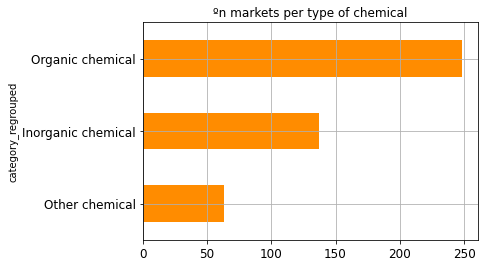

In [37]:
# Grouping by 'category_regrouped' and ploting the size of each group on a barh plot (in one line)

df_base_full_wCAS_woOutliersMDk20a5 = outlier_detectors.make_full_df_after_outlier_detection_method(
    df_to_detect_MDm, df_clean_metNtlNpr_MDm
)

internal_funcs.plot_categories(
    df_in=df_base_full_wCAS_woOutliersMDk20a5,
    groupby="category_regrouped",
    color="darkorange",
    fontsize=12,
)

### apply Robust Mahalanobis Distance method to detect outliers

In [38]:
# df_to_detect_RMDm = df_base_full
df_to_detect_RMDm = df_base_full_wCAS

(
    df_clean_metNtlNpr_RMDm,
    df_outliers_metNtlNpr_RMDm,
    more_metNtlNpr_RMDm,
) = outlier_detectors.robust_mahalanobis_method(
    df_to_detect_RMDm[
        #         lst_methods
        #         +
        lst_methods_TLs
        #         + ["referenceProduct_price"]
    ],
    alpha=(1 - 0.95),
    support_fraction=None,
)
print("out of", df_to_detect_RMDm.shape[0], "items")
print(len(more_metNtlNpr_RMDm[0]), "outliers detected")

outlier_detectors.make_full_df_after_outlier_detection_method(
    df_to_detect_RMDm, df_outliers_metNtlNpr_RMDm
)[
    ["referenceProduct"]
    + [lst_methods[0]]
    + [lst_methods_TLs[0]]
    + ["referenceProduct_price"]
]

out of 492 items
26 outliers detected


,referenceProduct,"('IPCC 2013 GWP 100a V1.03', 'IPCC GWP 100a', 'kg CO2 eq')","TL in ('PBs-LCIA (baseline) V0.72', 'Climate change - CO2 concentration', 'ppm')",referenceProduct_price
40,"Ethanol, without water, in 95% solution state,...",0.882455,47.335480,0.464996
41,"Ethanol, without water, in 99.7% solution stat...",1.708591,75.484285,0.625736
59,Magnetite,0.982376,548.048950,0.045639
211,Adipic acid,13.733554,77.620220,1.549988
235,"Ammonium nitrate, as N",7.993117,133.582556,0.588421
315,Charcoal,1.430764,48.939385,0.401849
338,Citric acid,6.148700,133.706019,1.119436
383,Dimethyldichlorosilane,6.145469,53.629595,2.497202
432,"Fluorescent whitening agent, distyrylbiphenyl ...",22.586475,259.926233,2.253223
459,Heavy water,1616.912100,46.942157,889.807779


In [95]:
df_outliers = df_base_full_wCAS.loc[more_metNtlNpr_RMDm[0],:][
    lst_metadata[0:1]
    + lst_metadata[4:5]
#     + ["referenceProduct_price"]
#     + lst_methods[0:1]
    + lst_methods_TLs
]
# df_outliers

In [96]:
%%time

# Set output directory
outputs_dir = set_outputs_dir(use_default=True)  # default `..\data\interim`

## Export dataframe to excel
excelName = "list-outliers.xlsx"

df_readme = make_readme_info(
    excelName,
    "Sheet1: Dataframe of chemicals detected as outliers using the robust MD method",
)

w_excel(
    path_to_file=outputs_dir,
    filename=excelName,
    dict_data_to_write={
        "Sheet1": df_outliers,
    },
    readme_info=("readme", df_readme),
    #     ExcelWriter_kwargs={"engine": "openpyxl", "encoding": "UTF-8"}
    #     startrow=0
)

File: list-outliers.xlsx successfully created in 
C:\Users\ViteksPC\Documents\00-ETH_projects\17-LCIA_methods_analysis\data\interim
Wall time: 233 ms


category_regrouped
Organic chemical      253
Inorganic chemical    144
Other chemical         69
dtype: int64
Total:  466

Shares in % for  category_regrouped
Inorganic chemical    30.90
Organic chemical      54.29
Other chemical        14.81
dtype: float64


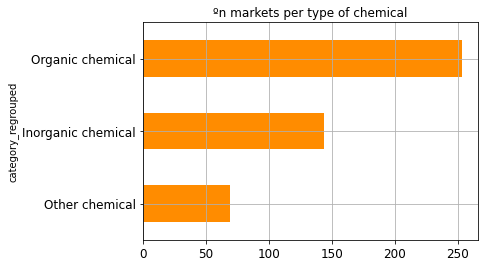

In [39]:
# Grouping by 'category_regrouped' and ploting the size of each group on a barh plot (in one line)
df_base_full_wCAS_woOutliersRMDk9a5 = outlier_detectors.make_full_df_after_outlier_detection_method(
    df_to_detect_RMDm, df_clean_metNtlNpr_RMDm
)
internal_funcs.plot_categories(
    df_in=df_base_full_wCAS_woOutliersRMDk9a5,
    groupby="category_regrouped",
    color="darkorange",
    fontsize=12,
)

activity_ISICclass
2011:Manufacture of basic chemicals                                                 524
2013:Manufacture of plastics and synthetic rubber in primary forms                   81
1920:Manufacture of refined petroleum products                                       59
2021:Manufacture of pesticides and other agrochemical products                       51
2023:Manufacture of soap and detergents, cleaning and polishing preparations, pe     30
2022:Manufacture of paints, varnishes and similar coatings, printing ink and mas     24
2029:Manufacture of other chemical products n.e.c.                                   20
2012:Manufacture of fertilizers and nitrogen compounds                               18
0161:Support activities for crop production                                          13
2011a: Manufacture of nuclear fuels                                                  13
2220:Manufacture of plastics products                                                11
3830:Material

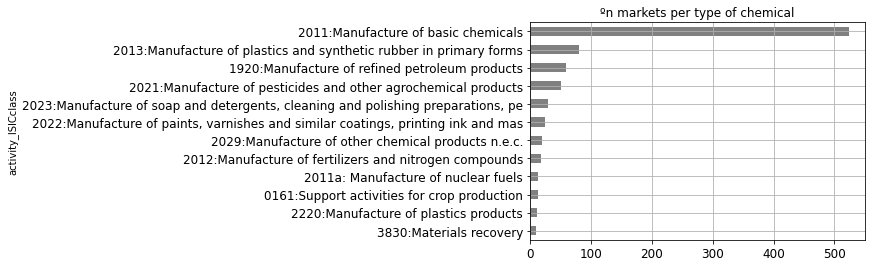

In [40]:
internal_funcs.plot_categories(
#     df_in=df_base_full_wCAS_woOutliersRMDk9a5,
#     df_in=df_analysis,
#         df_in=df_base_full, 
#     df_in=df_base_full_wCAS,
    df_in=df_cpc33to36, 
    groupby="activity_ISICclass",
    cutoff_value=10,
    color="gray",
    fontsize=12,
)

In [41]:
# df_cpc33to36[df_cpc33to36.activity_ISICclass=="1920:Manufacture of refined petroleum products"]

In [42]:
# sorted(df_base_full_wCAS_woOutliersRMDk9a5.activity_ISICclass.unique())
# sorted(df_base_full_wCAS.activity_ISICclass.unique())
# sorted(df_analysis.activity_ISICclass.unique())
sorted(df_base_full.activity_ISICclass.unique())

['0161:Support activities for crop production',
 '0220:Logging',
 '0729:Mining of other non-ferrous metal ores',
 '0891:Mining of chemical and fertilizer minerals',
 '1312:Weaving of textiles',
 '1920:Manufacture of refined petroleum products',
 '19a: Liquid and gaseous fuels from biomass',
 '2011:Manufacture of basic chemicals',
 '2011a: Manufacture of nuclear fuels',
 '2012:Manufacture of fertilizers and nitrogen compounds',
 '2013:Manufacture of plastics and synthetic rubber in primary forms',
 '2021:Manufacture of pesticides and other agrochemical products',
 '2022:Manufacture of paints, varnishes and similar coatings, printing ink and mas',
 '2023:Manufacture of soap and detergents, cleaning and polishing preparations, pe',
 '2029:Manufacture of other chemical products n.e.c.',
 '2030:Manufacture of man-made fibres',
 '20:Manufacture of chemicals and chemical products',
 '2100:Manufacture of pharmaceuticals, medicinal chemical and botanical products',
 '2219:Manufacture of other r

In [43]:
# df_base_full_wCAS_woOutliersRMDk9a5.shape
df_base_full_wCAS.shape

(492, 48)

In [44]:
# df_base_full_wCAS_woOutliersRMDk9a5[
#     df_base_full_wCAS_woOutliersRMDk9a5.activity_ISICclass.isin(
# df_base_full_wCAS[
#     df_base_full_wCAS.activity_ISICclass.isin(
df_base_full[
    df_base_full.activity_ISICclass.isin(
        [
            '0891:Mining of chemical and fertilizer minerals',
#             "2011:Manufacture of basic chemicals", # 361
#             "2011a: Manufacture of nuclear fuels", # 5
#             "2012:Manufacture of fertilizers and nitrogen compounds", # 11
#             "2013:Manufacture of plastics and synthetic rubber in primary forms", # 37
#             "2021:Manufacture of pesticides and other agrochemical products", # 20
#             "2023:Manufacture of soap and detergents, cleaning and polishing preparations, pe", # 7
#             "2029:Manufacture of other chemical products n.e.c.", # 4
#             "20:Manufacture of chemicals and chemical products", # 2
        ]
    )
]#.shape

,Activity,category_regrouped,activity_comment,type,referenceProduct,category,inline_comment,geo,activity_ISICclass,activity_ecoSpold01class,technologyLevel,referenceProductAmount,referenceProductUnit,referenceProduct_prodVolume,referenceProduct_prodVolumeComment,referenceProduct_price,referenceProduct_priceUnit,referenceProduct_priceComment,referenceProduct_casNumber,referenceProduct_CPCclass,activity_generalComment,sourceFilename,pubchem_match,num_matches,MF,MW,iupac,complexity,synonyms,"('IPCC 2013 GWP 100a V1.03', 'IPCC GWP 100a', 'kg CO2 eq')","('PBs-LCIA (baseline) V0.72', 'Climate change - CO2 concentration', 'ppm')","('PBs-LCIA (baseline) V0.72', 'Climate change - Energy imbalance', 'Wm-2')","('PBs-LCIA (baseline) V0.72', 'Stratospheric ozone depletion', 'DU')","('PBs-LCIA (baseline) V0.72', 'Ocean acidification', 'Omega Aragon')","('PBs-LCIA (baseline) V0.72', 'Biogeochemical flows - P', 'Tg P')","('PBs-LCIA (baseline) V0.72', 'Biogeochemical flows - N', 'Tg N')","('PBs-LCIA (baseline) V0.72', 'Land-system change - Global', '%')","('PBs-LCIA (baseline) V0.72', 'Freshwater use - Global', 'km3')","('PBs-LCIA (baseline) V0.72', 'Change in biosphere integrity - BII loss', '% BII loss')","TL in ('PBs-LCIA (baseline) V0.72', 'Climate change - CO2 concentration', 'ppm')","TL in ('PBs-LCIA (baseline) V0.72', 'Climate change - Energy imbalance', 'Wm-2')","TL in ('PBs-LCIA (baseline) V0.72', 'Stratospheric ozone depletion', 'DU')","TL in ('PBs-LCIA (baseline) V0.72', 'Ocean acidification', 'Omega Aragon')","TL in ('PBs-LCIA (baseline) V0.72', 'Biogeochemical flows - P', 'Tg P')","TL in ('PBs-LCIA (baseline) V0.72', 'Biogeochemical flows - N', 'Tg N')","TL in ('PBs-LCIA (baseline) V0.72', 'Land-system change - Global', '%')","TL in ('PBs-LCIA (baseline) V0.72', 'Freshwater use - Global', 'km3')","TL in ('PBs-LCIA (baseline) V0.72', 'Change in biosphere integrity - BII loss', '% BII loss')"
272,"Boric acid, anhydrous, powder {GLO}| market fo...",Other chemical,Production volume: 750000000 kgIncluded act...,Products,"Boric acid, anhydrous, powder",Chemicals\Acids (inorganic)\Market,Production Volume Amount: 750000000,GLO,0891:Mining of chemical and fertilizer minerals,chemicals/inorganics,0.0,1,kg,7.500000e+08,NaN,1.679153,USD2018,Calculated based on inputs: The price of the p...,10043-35-3,34: Basic chemicals,NaN,20800_038c0bbc-8cb3-448d-8d63-5b907c0ce670_49b...,by CAS,1,BH3O3,61.84,boric acid,8.0,"['BORIC ACID', 'Orthoboric acid', '10043-35-3'...",1.026287,2.551617e-11,3.440426e-13,6.186667e-15,7.797083e-14,5.993560e-16,1.100165e-13,6.171569e-16,4.143377e-12,2.556316e-13,15.575748,15.120918,0.018752,4.966484,0.002661,0.077989,0.001085,0.045526,1.123519
294,"Calcium borates {GLO}| market for | APOS, S",Other chemical,Production volume: 16660000000 kgIncluded a...,Products,Calcium borates,Chemicals\Inorganic\Market,Production Volume Amount: 16660000000,GLO,0891:Mining of chemical and fertilizer minerals,chemicals/inorganics,0.0,1,kg,1.666000e+10,NaN,0.631476,USD2018,Calculated value based on data from United Nat...,NaN,346: Fertilizers and pesticides,NaN,20847_113568bc-8b96-4fb6-b10b-de808de95f53_710...,No match,0,NaN,NaN,NaN,NaN,NaN,0.146463,3.805763e-12,5.067478e-14,1.065900e-15,1.162945e-14,1.599828e-17,3.764597e-15,2.025648e-16,1.871730e-13,3.788594e-14,6.177439,5.922308,0.008591,1.969742,0.000189,0.007096,0.000947,0.005469,0.442769
626,"Phosphate rock, as P2O5, beneficiated, dry {GL...",Other chemical,Production volume: 26705000000 kgIncluded a...,Products,"Phosphate rock, as P2O5, beneficiated, dry",Chemicals\Inorganic\Market,Production Volume Amount: 26705000000,GLO,0891:Mining of chemical and fertilizer minerals,chemicals/inorganics,0.0,1,kg,2.670500e+10,NaN,0.070324,USD2018,Calculated value based on data from United Nat...,065996-94-3,"34629: Other phosphatic fertilizers, n.e.c.",NaN,22683_57387112-6fd0-4c60-a0ca-495f762836a3_6dc...,by NAME,1,Ca5FO12P3,504.30,pentacalcium;fluoride;triphosphate,36.8,"['Fluora

### apply Tukey method to detect outliers (univariate)

In [45]:
# df_to_detect_Tm = df_base_full
df_to_detect_Tm = df_base_full_wCAS

df_clean_tukey, df_outliers_tukey = outlier_detectors.tukey_method_bulk(
    df_to_detect_Tm[lst_methods + lst_methods_TLs + ["referenceProduct_price"]],
    outlier_detection_fence="tight",
)
print("out of", df_to_detect_Tm.shape[0], "items")
print("Tukey univariate method detected:")
for i in df_outliers_tukey.columns:
    print("in ", i, ">>>>> ", df_outliers_tukey[i].count(), "outliers.")

out of 492 items
Tukey univariate method detected:
in  ('IPCC 2013 GWP 100a V1.03', 'IPCC GWP 100a', 'kg CO2 eq') >>>>>  52 outliers.
in  ('PBs-LCIA (baseline) V0.72', 'Climate change - CO2 concentration', 'ppm') >>>>>  48 outliers.
in  ('PBs-LCIA (baseline) V0.72', 'Climate change - Energy imbalance', 'Wm-2') >>>>>  52 outliers.
in  ('PBs-LCIA (baseline) V0.72', 'Stratospheric ozone depletion', 'DU') >>>>>  89 outliers.
in  ('PBs-LCIA (baseline) V0.72', 'Ocean acidification', 'Omega Aragon') >>>>>  48 outliers.
in  ('PBs-LCIA (baseline) V0.72', 'Biogeochemical flows - P', 'Tg P') >>>>>  86 outliers.
in  ('PBs-LCIA (baseline) V0.72', 'Biogeochemical flows - N', 'Tg N') >>>>>  89 outliers.
in  ('PBs-LCIA (baseline) V0.72', 'Land-system change - Global', '%') >>>>>  50 outliers.
in  ('PBs-LCIA (baseline) V0.72', 'Freshwater use - Global', 'km3') >>>>>  65 outliers.
in  ('PBs-LCIA (baseline) V0.72', 'Change in biosphere integrity - BII loss', '% BII loss') >>>>>  55 outliers.
in  TL in ('

### apply Mahalanobis Distance method to detect outliers depending on CATEGORY

In [46]:
# chemical_cat = "Organic chemical"
chemical_cat = "Inorganic chemical"
# chemical_cat = "Other chemical"
# df_to_detect_MDmCAT = df_base_full[df_base_full.category_regrouped==chemical_cat]
df_to_detect_MDmCAT = df_base_full_wCAS[
    df_base_full_wCAS.category_regrouped == chemical_cat
]

(
    df_clean_metNtlNpr_MDmCAT,
    df_outliers_metNtlNpr_MDmCAT,
    more_metNtlNpr_MDmCAT,
) = outlier_detectors.mahalanobis_method(
    df_to_detect_MDmCAT[lst_methods + lst_methods_TLs + ["referenceProduct_price"]],
    alpha=(1 - 0.95),
)
print("out of", df_to_detect_MDmCAT.shape[0], "items")
print(len(more_metNtlNpr_MDmCAT[0]), "outliers detected")

outlier_detectors.make_full_df_after_outlier_detection_method(
    df_to_detect_MDmCAT, df_outliers_metNtlNpr_MDmCAT
)[
    ["referenceProduct"]
    + [lst_methods[0]]
    + [lst_methods_TLs[0]]
    + ["referenceProduct_price"]
]

# df_clean_metNtlNpr_MDmCAT.sort_values(by="('IPCC 2013 GWP 100a V1.03', 'IPCC GWP 100a', 'kg CO2 eq')").tail(5)

out of 151 items
25 outliers detected


,referenceProduct,"('IPCC 2013 GWP 100a V1.03', 'IPCC GWP 100a', 'kg CO2 eq')","TL in ('PBs-LCIA (baseline) V0.72', 'Climate change - CO2 concentration', 'ppm')",referenceProduct_price
301,Calcium nitrate,3.132682,54.344039,0.678837
442,"Gallium, semiconductor-grade",145.732450,8.076758,430.552151
459,Heavy water,1616.912100,46.942157,889.807779
460,Helium,8.753025,15.018336,11.954998
461,"Helium, crude stockpiling",1.952384,68.282645,0.617125
484,Indium,215.666280,4.375517,1227.073631
517,Lithium,48.094069,17.656293,69.503077
566,Neodymium oxide,25.676907,39.523014,16.360982
635,"Phosphorus, white, liquid",12.060422,109.485167,2.827292
702,Praseodymium oxide,24.103360,39.528435,15.356360


In [47]:
df_base_full_wCAS.loc[162:163]

,Activity,category_regrouped,activity_comment,type,referenceProduct,category,inline_comment,geo,activity_ISICclass,activity_ecoSpold01class,technologyLevel,referenceProductAmount,referenceProductUnit,referenceProduct_prodVolume,referenceProduct_prodVolumeComment,referenceProduct_price,referenceProduct_priceUnit,referenceProduct_priceComment,referenceProduct_casNumber,referenceProduct_CPCclass,activity_generalComment,sourceFilename,pubchem_match,num_matches,MF,MW,iupac,complexity,synonyms,"('IPCC 2013 GWP 100a V1.03', 'IPCC GWP 100a', 'kg CO2 eq')","('PBs-LCIA (baseline) V0.72', 'Climate change - CO2 concentration', 'ppm')","('PBs-LCIA (baseline) V0.72', 'Climate change - Energy imbalance', 'Wm-2')","('PBs-LCIA (baseline) V0.72', 'Stratospheric ozone depletion', 'DU')","('PBs-LCIA (baseline) V0.72', 'Ocean acidification', 'Omega Aragon')","('PBs-LCIA (baseline) V0.72', 'Biogeochemical flows - P', 'Tg P')","('PBs-LCIA (baseline) V0.72', 'Biogeochemical flows - N', 'Tg N')","('PBs-LCIA (baseline) V0.72', 'Land-system change - Global', '%')","('PBs-LCIA (baseline) V0.72', 'Freshwater use - Global', 'km3')","('PBs-LCIA (baseline) V0.72', 'Change in biosphere integrity - BII loss', '% BII loss')","TL in ('PBs-LCIA (baseline) V0.72', 'Climate change - CO2 concentration', 'ppm')","TL in ('PBs-LCIA (baseline) V0.72', 'Climate change - Energy imbalance', 'Wm-2')","TL in ('PBs-LCIA (baseline) V0.72', 'Stratospheric ozone depletion', 'DU')","TL in ('PBs-LCIA (baseline) V0.72', 'Ocean acidification', 'Omega Aragon')","TL in ('PBs-LCIA (baseline) V0.72', 'Biogeochemical flows - P', 'Tg P')","TL in ('PBs-LCIA (baseline) V0.72', 'Biogeochemical flows - N', 'Tg N')","TL in ('PBs-LCIA (baseline) V0.72', 'Land-system change - Global', '%')","TL in ('PBs-LCIA (baseline) V0.72', 'Freshwater use - Global', 'km3')","TL in ('PBs-LCIA (baseline) V0.72', 'Change in biosphere integrity - BII loss', '% BII loss')"
162,"Uranium, enriched 3.9%, in fuel element for li...",Other chemical,Production volume: 1956521.73913044 kgInclu...,Products,"Uranium, enriched 3.9%, in fuel element for li...",Fuels\Uranium\Enriched\Market,Production Volume Amount: 1956521.73913044,GLO,2011a: Manufacture of nuclear fuels,nuclear power/production,0.0,1,kg,1.956522e+06,NaN,841.011869,USD2018,Calculated based on inputs: The price of the p...,NaN,33620: Uranium enriched in U235 and its compou...,NaN,23456_55ad48f7-f8ad-4d6c-9359-ab54d77ae94a_e4b...,by NAME,1,U,238.0289,uranium,0.0,"['7440-61-1', 'U', 'Uranium', 'Uranium, natura...",3558.2903,8.025498e-08,1.154215e-09,1.898091e-10,2.452385e-10,2.066723e-12,1.552963e-09,5.197372e-13,5.860487e-08,8.384247e-10,97.812362,101.283999,1.148691,31.188450,0.018319,2.197979,0.001824,1.285665,7.357297
163,"Uranium, enriched 4%, in fuel element for ligh...",Other chemical,Production volume: 1888111.88811189 kgInclu...,Products,"Uranium, enriched 4%, in fuel element for ligh...",Fuels\Uranium\Enriched\Market,Production Volume Amount: 1888111.88811189,GLO,2011a: Manufacture of nuclear fuels,nuclear power/production,0.0,1,kg,1.888112e+06,NaN,841.011869,USD2018,Calculated based on inputs: The price of the p...,NaN,33620: Uranium enriched in U235 and its compou...,NaN,23460_7de5c877-0fd7-4362-8a8f-c71d07fd7626_83f...,by NAME,1,U,238.0289,uranium,0.0,"['7440-61-1', 'U', 'Uranium', 'Uranium, natura...",3669.2213,8.270946e-08,1.189948e-09,1.964145e-10,2.527388e-10,2.121208e-12,1.590683e-09,5.333078e-13,6.024732e-08,8.643606e-10,100.803808,104.419621,1.188666,32.142303,0.018802,2.251366,0.001872,1.321697,7.584888


# OUTPUTS: Export data to excel

In [77]:
# TEMPORAL
# Make df of lst_metadata, lst_methods_TLs and lst_methods for later export

df_metadata = pd.DataFrame(lst_metadata, columns=["lst_metadata"])
df_methods_TLs = pd.DataFrame(lst_methods_TLs, columns=["lst_methods_TLs"]) 
df_methods = pd.DataFrame(lst_methods, columns=["lst_methods"])


In [78]:
%%time

# Set output directory
outputs_dir = set_outputs_dir(use_default=True)  # default `..\data\interim`

## Export dataframe to excel
excelName = "temp-df_base_full_wCAS_woOutliersRMDk9a5.xlsx"

df_readme = make_readme_info(
    excelName,
    "Temporal output from 0.30-to-0.83.ipynb. \n"
    "Is used for plotting\n"
    "Will have to be split later...",
)

w_excel(
    path_to_file=outputs_dir,
    filename=excelName,
    dict_data_to_write={
        "Sheet1": df_base_full_wCAS_woOutliersRMDk9a5,
        "highlighted_product": df_highlighted_product,
        "lst_metadata" : df_metadata,
        "lst_methods_TLs": df_methods_TLs,
        "lst_methods": df_methods,
    },
    readme_info=("readme", df_readme),
    #     ExcelWriter_kwargs={"engine": "openpyxl", "encoding": "UTF-8"}
    #     startrow=0
)

File: temp-df_base_full_wCAS_woOutliersRMDk9a5.xlsx successfully created in 
C:\Users\ViteksPC\Documents\00-ETH_projects\17-LCIA_methods_analysis\data\interim
Wall time: 1.28 s


In [79]:
%%time

# Set output directory
outputs_dir = set_outputs_dir(use_default=True)  # default `..\data\interim`

## Export dataframe to excel
excelName = "temp-df_base_full_wCAS.xlsx"

df_readme = make_readme_info(
    excelName,
    "Temporal output from 0.30-to-0.83.ipynb. \n"
    "Is used for plotting\n"
    "Will have to be split later...",
)

w_excel(
    path_to_file=outputs_dir,
    filename=excelName,
    dict_data_to_write={
        "Sheet1": df_base_full_wCAS,
        "highlighted_product": df_highlighted_product,
        "lst_metadata" : df_metadata,
        "lst_methods_TLs": df_methods_TLs,
        "lst_methods": df_methods,        
    },
    readme_info=("readme", df_readme),
    #     ExcelWriter_kwargs={"engine": "openpyxl", "encoding": "UTF-8"}
    #     startrow=0
)

File: temp-df_base_full_wCAS.xlsx successfully created in 
C:\Users\ViteksPC\Documents\00-ETH_projects\17-LCIA_methods_analysis\data\interim
Wall time: 1.39 s
